In [21]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import json
import sys
from json import dumps, loads, JSONEncoder, JSONDecoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score, accuracy_score, confusion_matrix, classification_report

pd.set_option('display.max_colwidth', 300)

In [31]:
# https://github.com/mohamedali92/google-play-reviews-scraper/blob/master/google_play_reviews_scraper/app.py

postParams ={'reviewType': 0, 
             'pageNum': 0,
             'id': 'com.spotify.music',
             'reviewSortOrder': 2, # 2: most helpful, 0: latest
             'xhr': 1}

url = 'https://play.google.com/store/getreviews'

r = requests.post(url, data=postParams)
postResults = r.content


contentIdx = 0
apiJsonStartIndex = 6
htmlStartIndex = 2

# Classes for parsing
reviewBodyClass = "single-review"

# Read in the API Request
postResultsString = postResults

# Attempt to parse result
result = json.loads(postResultsString[apiJsonStartIndex:])[contentIdx][htmlStartIndex]

htmlResult = BeautifulSoup(result, "html.parser")

# parsedResults = [self.generateScrapedObject(reviewBody) for \
#                  reviewBody in htmlResult.find_all(class_=reviewBodyClass)]

In [32]:
htmlResult

 <div class="single-review" tabindex="0"> <span> <span class="responsive-img-ldpi"> <span class="responsive-img author-image" style="background-image:url(https://lh3.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g=w48-h48-p)"></span> </span> <span class="responsive-img-hdpi"> <span class="responsive-img author-image" style="background-image:url(https://lh3.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g=w96-h96-p)"></span> </span> </span> <div class="review-header" data-expand-target="" data-reviewid="gp:AOqpTOFIE-1mfcsLZD46JUrDhYyiYgDoFeUV4O5hFzL_DjMWpCTlFQLz60aVSs6c6dszVkDkRAYhyYBxJAzhug"> <div class="review-info"> <span class="author-name"> A Google User </span> <span class="review-date">25 June 2019</span> <a class="reviews-permalink" href="/store/apps/details?id=com.spotify.music&amp;reviewId=Z3A6QU9xcFRPRklFLTFtZmNzTFpENDZKVXJEaFl5aVlnRG9GZVVWNE81aEZ6TF9Eak1XcENUbEZRT

In [8]:
# %%time
headers = {'User-Agent': 'Mozilla/5.0'}
cat = ['asia', 'business', 'world', 'technology', 'singapore', 'health']
news_all = pd.DataFrame(columns=['Title','PageLink','Article','Date','Category'])

for c in cat:
    url = 'https://www.channelnewsasia.com/news/%s' % c

    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text)

    a_tag = soup.findAll('a')
    
    # get links of all articles
    art_links = list()
    for i in range(len(a_tag)):
        if 'data-url' in str(a_tag[i]):
            # print(i, a_tag[i]['data-url'])  #['data-url']
            art_links.append(a_tag[i]['data-url'])

    art_links = list(set(art_links))
    print(c, len(art_links))
    
    # get texts
    title = []
    articles_all = []

    for link in art_links:    
        # session = requests.Session()
        page = requests.get(link, headers=headers)
        soup = BeautifulSoup(page.text)

        # title
        t = soup.title.get_text()
        print(c, t)
        title.append(t)

        # store the text for each article
        paragraphs = soup.find_all('p')
        paragraphtext = []    
        for p in paragraphs:
            paragraphtext.append(p.get_text())

        article = [' \n'.join(paragraphtext)]
        articles_all.append(article)

        time.sleep(np.random.choice(7))
        
    # create pd df for one cat
    data = {'Title': title, 
        'PageLink': art_links, 
        'Article': articles_all, 
        'Date': datetime.now(),
        'Category': c}

    news = pd.DataFrame(data=data)
    
    # append cat news to all news df
    news_all = news_all.append(news, sort=False)

print('done!')

asia 53
asia US North Korea envoy in Moscow amid reports of Kim-Putin talks - CNA
asia Numbers game: How Thailand's election system favours pro-army parties - CNA
asia China province seeks to alleviate poverty through artificial intelligence | Video - CNA
asia Prague honours late Chinese dissident Liu with bust - CNA
asia Welcome to scam town  - CNA
asia Indonesian presidential candidates battle for West Java voters | Video  - CNA
asia Couple's sea home vision sunk by Thai navy charges - CNA
asia A small step for China: Mars base for teens opens in desert - CNA
asia New Bill to give Thai spy agency sweeping powers - CNA
asia China turns to big data to steer economic growth | Video - CNA
asia About 38,000 Indonesians turn up to cast their votes in Singapore | Video - CNA
asia Bangkok food sellers eye return to the streets as military government faces election test - CNA
asia Commentary: A spirit of pessimism hovers over Hong Kong, one of the least happy places in the world - CNA
asia In

world 47
world Trade, North Korea on agenda for Abe-Trump White House meeting - CNA
world NASA astronaut to set record for longest space flight by a woman  - CNA
world White House, Justice Department officials discussed Mueller report ahead of release: Report - CNA
world Scammers preying on Notre-Dame donors, France warns - CNA
world Hatred of journalists turning to violence, watchdog warns - CNA
world Germany struggles in UN push to address sexual violence - CNA
world The US state of New York is toughening its gun laws in the hope of reducing the risk of school shootings | Video - CNA
world Endangered New Zealand Kakapo population boosted by record number of chicks - CNA
world Cathedral bells ring out across France after Notre-Dame catastrophe - CNA
world France to ban food additive E171 from next year  - CNA
world Flood of lawsuits, flight of investors on cards with US Cuba move - CNA
world Philippine, US troops wrap up drills conducted against background of tensions in South China S

singapore New attractions, hotel in Jurong Lake District as tourism sector gets tech boost| Video - CNA
singapore Foodies make a beeline for popular eateries as Jewel Changi Airport opens - CNA
singapore 2 men acquitted of charges in 12-hour attack that left teenage girl with spine fracture - CNA
singapore Foreigners leaving Singapore will no longer have their passports stamped - CNA
singapore Last Day at Work: 'Education is in my DNA’ says school principal as she draws the curtain on a long career - CNA
singapore MOM to develop guidelines on rest areas for lower-wage workers | Video - CNA
singapore From garden cart to Garden City: Shake Shack goes full circle with Singapore debut - CNA
singapore CNB arrests 4, seizes large assortment of drugs worth about S$45,000 - CNA
singapore PUB issues termination notice to Tuaspring, will take over desalination plant in 30 days - CNA
singapore Massage therapist jailed and fined for molesting customer, having obscene videos - CNA
singapore PUB iss

In [9]:
news_all.shape

(267, 5)

In [10]:
# news_all.to_csv('data/cna-news-all-%s.csv' % str(datetime.now().date()), sep='|', encoding="utf-8")

In [17]:
df = pd.read_csv('data/cna-news-all.csv', sep='|', encoding="utf-8")
df = df.drop(columns=['Unnamed: 0'])

# df2 = pd.read_csv('data/cna-news-all-2019-04-02.csv', sep='|')

In [18]:
# df2 = pd.read_csv('data/cna-news-all-2019-03-28.csv', sep='|')
# df3 = pd.read_csv('data/cna-news-all-2019-04-01.csv', sep='|') 
# df4 = pd.read_csv('data/cna-news-all-2019-04-02.csv', sep='|') 
# df5 = pd.read_csv('data/cna-news-all-2019-04-03.csv', sep='|')
df.head(2)

,Title,PageLink,Article,Date,Category,article_len
0,"Military-backed party 'confident' it can form government, setting stage for standoff in Thailand - Channel NewsAsia",https://www.channelnewsasia.com/news/asia/palang-pracharat-confident-it-can-form-government-thai-election-11385792,"'BANGKOK: The pro-military Palang Pracharat party has claimed the right to form the next Thai government, based on its early lead in the popular vote. \nIts leader, Uttama Savanayana, said Palang Pracharat was taking its time to form a coalition as there are six weeks until official results are ...",2019-03-28 12:41:50.951786,asia,529
1,China slams British warning over Hong Kong freedoms - Channel NewsAsia,https://www.channelnewsasia.com/news/asia/china-slams-british-warning-over-hong-kong-freedoms-11386838,"'HONG KONG: China on Wednesday (Mar 27) condemned a British report that expressed concern over eroding freedoms in Hong Kong, accusing the UK of having ""ignored and distorted the truth"" about the city. \nFormer British colony Hong Kong enjoys rights unseen on the Chinese mainland, including free...",2019-03-28 12:41:50.951786,asia,375


In [12]:
# df = pd.DataFrame(columns=['Title','PageLink','Article','Date','Category'])

# df = df.append(df2, sort=False)
# df = df.append(df3, sort=False)
# df = df.append(df4, sort=False)
# df = df.append(df5, sort=False)

df = df.append(news_all, sort=False)

In [13]:
# df = df.drop(columns=['Unnamed: 0'])

df.to_csv('data/cna-news-all.csv', sep='|', encoding="utf-8")

In [2]:
df = pd.read_csv('data/cna-news-all.csv', sep='|', encoding="utf-8")
df = df.drop(columns=['Unnamed: 0'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641 entries, 0 to 1640
Data columns (total 6 columns):
Title          1641 non-null object
PageLink       1641 non-null object
Article        1641 non-null object
Date           1641 non-null object
Category       1641 non-null object
article_len    1641 non-null int64
dtypes: int64(1), object(5)
memory usage: 77.0+ KB


In [22]:
df['Category'].value_counts()

asia          253
business      250
singapore     231
world         229
technology    173
health        158
Name: Category, dtype: int64

In [26]:
df['Article'] = df['Article'].apply(lambda a: str(a).replace('\\n','').replace('[','').replace(']','').replace('\\xa0', ' '))

df['article_len'] = df['Article'].apply(lambda a: len(a.split(' ')))

df.drop_duplicates(['PageLink'], inplace=True)#.reset_index()
df.reset_index(inplace=True, drop=True)

df.shape

(1641, 6)

In [27]:
df.head()

,Title,PageLink,Article,Date,Category,article_len
0,"Military-backed party 'confident' it can form government, setting stage for standoff in Thailand - Channel NewsAsia",https://www.channelnewsasia.com/news/asia/palang-pracharat-confident-it-can-form-government-thai-election-11385792,"'BANGKOK: The pro-military Palang Pracharat party has claimed the right to form the next Thai government, based on its early lead in the popular vote. Its leader, Uttama Savanayana, said Palang Pracharat was taking its time to form a coalition as there are six weeks until official results are pu...",2019-03-28 12:41:50.951786,asia,529
1,China slams British warning over Hong Kong freedoms - Channel NewsAsia,https://www.channelnewsasia.com/news/asia/china-slams-british-warning-over-hong-kong-freedoms-11386838,"'HONG KONG: China on Wednesday (Mar 27) condemned a British report that expressed concern over eroding freedoms in Hong Kong, accusing the UK of having ""ignored and distorted the truth"" about the city. Former British colony Hong Kong enjoys rights unseen on the Chinese mainland, including freedo...",2019-03-28 12:41:50.951786,asia,375
2,US-China trade talks open in Beijing - Channel NewsAsia,https://www.channelnewsasia.com/news/asia/us-china-trade-talks-open-in-beijing-11387188,'BEIJING: The United States and China open the latest round of their trade talks Thursday (Mar 28) as the economic superpowers edge towards a deal to resolve a months-long spat that has rattled the global economy. The two-day meetings between US Trade Representative Robert Lighthizer and Treasur...,2019-03-28 12:41:50.951786,asia,758
3,Huge growth opportunities for renewable energy sources in ASEAN - Channel NewsAsia,https://www.channelnewsasia.com/news/asia/huge-growth-opportunities-for-renewable-energy-sources-in-asean-11382512,"'There are about 70 million people in ASEAN with no reliable access to electricity, says auditing firm KPMG. That and the falling price of renewable energy have created huge growth opportunities for renewable power sources that are better able to reach remote areas. Gwyneth Teo reports. Copyri...",2019-03-28 12:41:50.951786,asia,57
4,Thai elections: Wooing the rural vote - Channel NewsAsia,https://www.channelnewsasia.com/news/asia/thai-elections-wooing-the-rural-vote-11365840,"'Voters in Thailand\'s rural and agricultural heartlands have long proved influential during elections. To woo the rural vote, parties have suggested policies such as giving free education to children of farmers, as well as building new infrastructure to narrow the gap between rural and urban ar...",2019-03-28 12:41:50.951786,asia,71


In [28]:
(df['Article'][741])

'\'SINGAPORE: Singapore\\\'s maritime sector is preparing to ride the wave of digitalisation as a means to further growth and navigate choppy waters, industry professionals said on Tuesday (Apr 2). Speaking on the sidelines of a media briefing for the upcoming Singapore Maritime Week 2019, Ms Quah Ley Hoon, the chief executive of Maritime and Port Authority of Singapore (MPA), said that digitalisation is key to developing “a vibrant maritime ecosystem”, using new digital technologies in blockchain and big data. Mr Michael Phoon, executive director of the Singapore Shipping Association (SSA), also said that digitalisation is the way forward, citing the transformation of other industries. “As we grow and as we move towards innovation, we want to put the industry in a digitalisation and technology adoption phase,” said Mr Phoon. Mr Phoon noted the transformation of the telecommunications sector from 4G to 5G networks, and how SMEs in the local shipping sector are already adopting robotic 

In [36]:
# classify

In [29]:
X = df['Article']
Y = df['Category']

vec = TfidfVectorizer(stop_words='english', min_df=20, max_df=0.8, token_pattern=r'(?u)\b[A-Za-z]+\b')
X = vec.fit_transform(X)

In [30]:
X

<1641x2941 sparse matrix of type '<class 'numpy.float64'>'
	with 187895 stored elements in Compressed Sparse Row format>

In [31]:
X_sparse = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

In [32]:
trainX, testX, trainY, testY = train_test_split(X_sparse, Y, test_size = 0.2, random_state = 55)

print(trainX.shape)
print(trainY.shape)

(1312, 2941)
(1312,)


In [33]:
sum_words = X.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

tf_freq_df = pd.DataFrame(words_freq, columns=['word', 'tfidf-score'])
# wfreq_df = wfreq_df[wfreq_df['count'] < 3000000]
tf_freq_df.shape

(2941, 2)

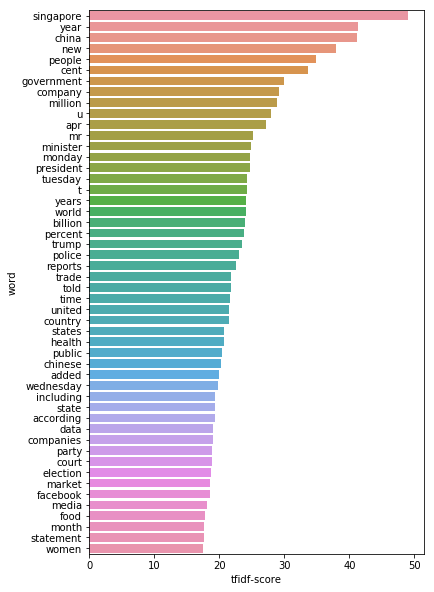

In [34]:
fig, ax = plt.subplots(figsize=(6,10))

tf_freq_df = tf_freq_df[0:50]
sns.barplot(y=tf_freq_df['word'], x=tf_freq_df['tfidf-score'])
plt.show()

In [35]:
nb_model = MultinomialNB()

nb_model.fit(trainX, trainY)
labels = nb_model.predict(testX)

Text(37.32000000000001, 0.5, 'predicted label')

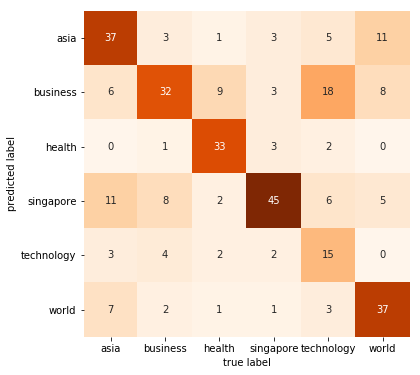

In [36]:
mat = confusion_matrix(testY, labels)
cat = list(trainY.unique())
cat.sort()

fig, ax = plt.subplots(figsize=(6,6))

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Oranges',
            xticklabels=cat, \
            yticklabels=cat, )  # train.target_names

plt.xlabel('true label')
plt.ylabel('predicted label')

In [47]:
mat

array([[24,  3,  0,  3,  2,  5],
       [ 3, 27,  2,  5,  2,  3],
       [ 1,  4, 16,  3,  0,  4],
       [ 2,  7,  1, 30,  0,  1],
       [ 2,  9,  0,  1, 12,  2],
       [ 4,  3,  1,  1,  2, 21]])

In [37]:
testY.value_counts()

asia          64
world         61
singapore     57
business      50
technology    49
health        48
Name: Category, dtype: int64

In [38]:
print(classification_report(testY, labels))

              precision    recall  f1-score   support

        asia       0.62      0.58      0.60        64
    business       0.42      0.64      0.51        50
      health       0.85      0.69      0.76        48
   singapore       0.58      0.79      0.67        57
  technology       0.58      0.31      0.40        49
       world       0.73      0.61      0.66        61

   micro avg       0.60      0.60      0.60       329
   macro avg       0.63      0.60      0.60       329
weighted avg       0.63      0.60      0.60       329

